In [9]:
import numpy as np
import pandas as pd

# Audio feature extraction
import librosa as lb

# Visualization
import matplotlib.pyplot as plt
import librosa.display 
import seaborn as sns

# Model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Render figures interactively in the notebook
%matplotlib inline

# Audio widget for playback
from IPython.display import Audio

# Importing files
from os import listdir


In [4]:
cd Documents/code/ds/METIS/sea19_ds7_workingdir/Project_McNulty/CREMA-D/AudioMP3/

/Users/cmeaton/Documents/code/ds/METIS/sea19_ds7_workingdir/Project_McNulty/CREMA-D/AudioMP3


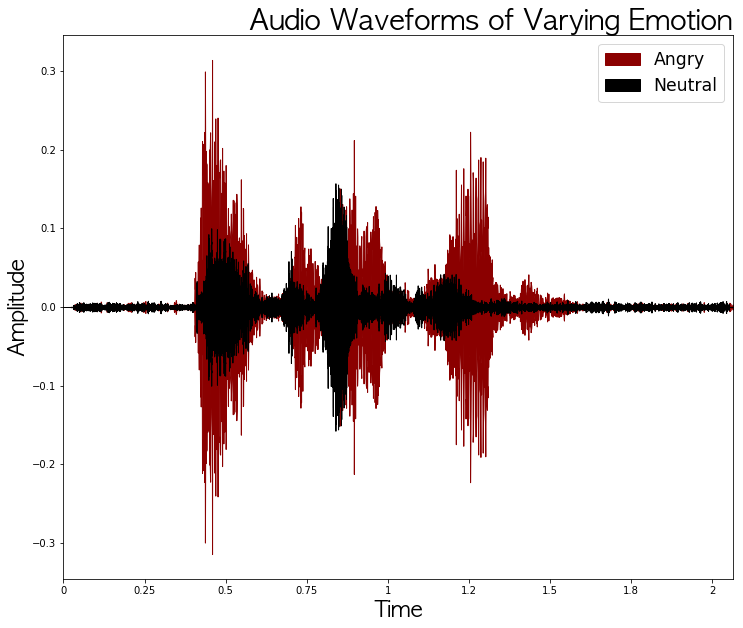

In [5]:
# setting sample file path


y, sr = lb.load('1001_DFA_NEU_XX.mp3')
y1, sr1 = lb.load('1001_DFA_ANG_XX.mp3')
y2, sr2 = lb.load('1001_DFA_HAP_XX.mp3')

plt.figure(figsize=(12,10))
plt.title('Audio Waveforms of Varying Emotion', family='AppleGothic', loc='right', size=28)
plt.xlabel('Time', family='AppleGothic', size=22)
plt.ylabel('Amplitude', family='AppleGothic', size=22);
lb.display.waveplot(y=y1, sr=sr1, color='DarkRed', alpha=1, label='Angry')
#lb.display.waveplot(y=y2, sr=sr2, color='black', alpha=.5)
lb.display.waveplot(y=y, sr=sr, color='black', alpha=1, label='Neutral')
plt.legend(fontsize = 'xx-large');

In [16]:
cd raw_data/

/Users/cmeaton/Documents/code/ds/METIS/sea19_ds7_workingdir/Project_McNulty/raw_data


In [17]:
Audio('hannah_happy_test.mp3')

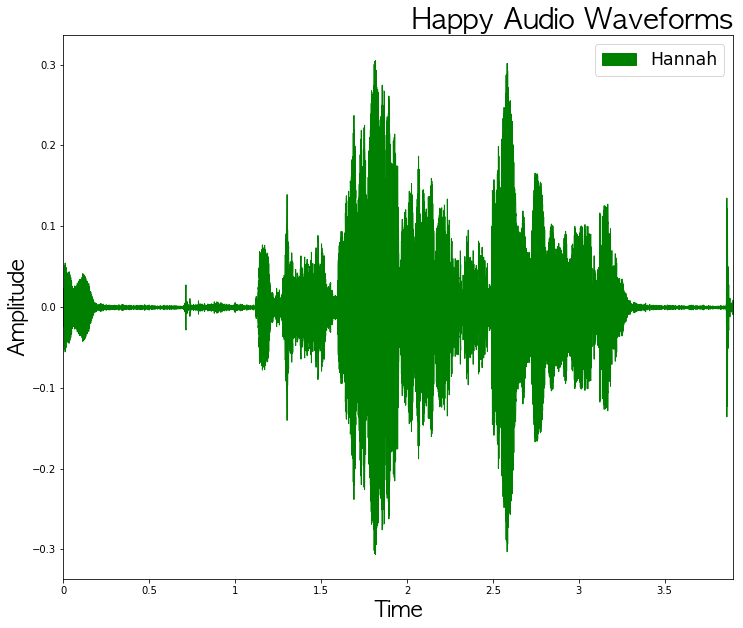

In [18]:
y3, sr3 = lb.load('hannah_happy_test.mp3')

plt.figure(figsize=(12,10))
plt.title('Happy Audio Waveforms', family='AppleGothic', loc='right', size=28)
plt.xlabel('Time', family='AppleGothic', size=22)
plt.ylabel('Amplitude', family='AppleGothic', size=22);
lb.display.waveplot(y=y3, sr=sr3, color='Green', alpha=1, label='Hannah')
#lb.display.waveplot(y=y2, sr=sr2, color='black', alpha=.5)
#lb.display.waveplot(y=y4, sr=sr4, color='black', alpha=1, label='Actor')
plt.legend(fontsize='xx-large');

In [10]:
def extract_features(filename):
    '''Loading in audiofiles and extracting features. Features include:
        - mfcc = Mel-frequency cepstral coefficients. Commonly used for vocals.
        - centroid = Spectral Centroid. Represents mean value of frequency form. 
        - flatness = Spectral flatness. Distinguishes noisy vs harmonic sound.
        - tempo = Spectral onset envelope. Describes rythm.
        - cens = Chroma Energy Normalized Statistics. Smooths frequency windows for matching.
        - energy = Root Mean Square Energy. Computes energy of each frame.
        - melspec = Mel-Scaled Spectrogram.
        - contrast = Spectral Contrast.
        - tonnetz = Tonnetz. Computes tonal centroid features.
        - chroma = Chromagram from waveform.
    '''
    
    # load in file. y is the waveform, sr is the sampling rate.
    y, sr = lb.load(filename)
    
    # Short-time Fourier transformation.
    stft = np.abs(lb.stft(y))
    S, phase = lb.magphase(np.abs(stft))

    # all features chroma, contrast, energy, flatness, and MFCC
    #mfcc = np.mean(lb.feature.mfcc(y=y, sr=sr))   
    mfcc_std = lb.feature.mfcc(y=y, sr=sr)
    #centroid = np.mean(lb.feature.spectral_centroid(y=y, sr=sr))
    #centroid_std = np.std(lb.feature.spectral_centroid(y=y, sr=sr))
    #flatness = np.mean(lb.feature.spectral_flatness(y=y, S=S))
    flatness_std = lb.feature.spectral_flatness(y=y, S=S)
#     tempo = np.mean(lb.feature.tempogram(y=y, sr=sr))
#     tempo_std = np.std(lb.feature.tempogram(y=y, sr=sr))
#     cens = np.mean(lb.feature.chroma_cens(y=y, sr=sr))
#     cens_std = np.std(lb.feature.chroma_cens(y=y, sr=sr))
#     energy = np.mean(lb.feature.rmse(y=y))
    energy_std = lb.feature.rmse(y=y)
#     melspec = np.mean(lb.feature.melspectrogram(y=y, sr=sr))
#     melspec_std = np.std(lb.feature.melspectrogram(y=y, sr=sr))
#     contrast = np.mean(lb.feature.spectral_contrast(y=y, sr=sr))
#     contrast_std = np.std(lb.feature.spectral_contrast(y=y, sr=sr))
#     tonnetz = np.mean(lb.feature.tonnetz(y=y, sr=sr))
#     tonnetz_std = np.std(lb.feature.tonnetz(y=y, sr=sr))
#     chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sr))
    chroma_std = librosa.feature.chroma_stft(S=stft, sr=sr)
#     zero = np.mean(librosa.feature.zero_crossing_rate(y=y))
#     zero_std = np.std(librosa.feature.zero_crossing_rate(y=y))

    # Create a dict of features
    audio_features = {'filename': filename,
                     #'mfcc': mfcc,
                     'mfcc_std': mfcc_std,
#                      'centroid': centroid,
#                      'centroid_std': centroid_std,
#                      'flatness': flatness,
                     'flatness_std': flatness_std,
#                      'tempo': tempo,
#                      'tempo_std':tempo_std,
#                      'cens': cens,
#                      'cens_std':cens_std,
#                      'energy': energy,
                     'energy_std': energy_std,
#                      'melspec': melspec,
#                      'melspec_std':melspec_std,
#                      'contrast': contrast,
#                      'contrast_std': contrast_std,
#                      'tonnetz': tonnetz,
#                      'tonnetz_std':tonnetz_std,
#                      'chroma': chroma,
                     'chroma_std': chroma_std,
#                      'zero': zero,
#                      'zero_std': zero_std
                     }
    return audio_features


In [11]:
anger = extract_features('1001_DFA_ANG_XX.mp3')
happy = extract_features('1001_DFA_HAP_XX.mp3')
sad = extract_features('1001_MTI_SAD_XX.mp3')
neutral = extract_features('1001_DFA_NEU_XX.mp3')

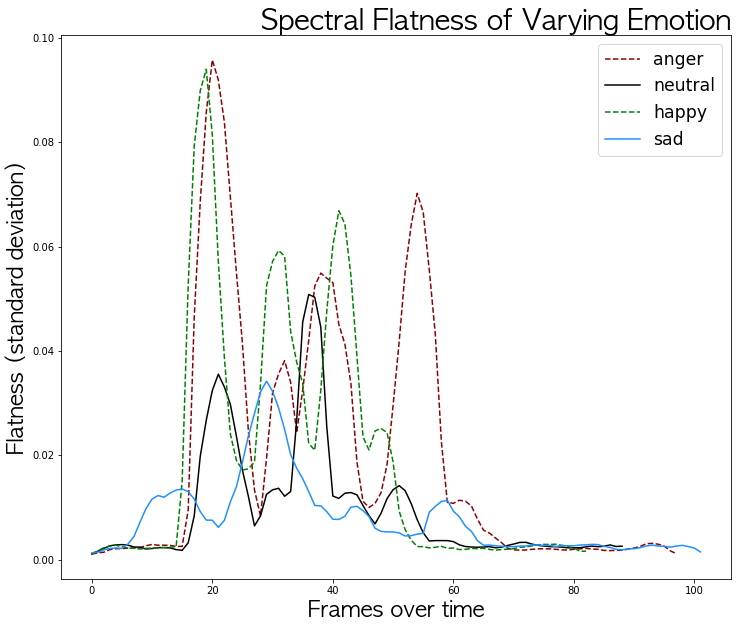

In [12]:
x = list(anger.values())[3]
y = list(neutral.values())[3]
z = list(happy.values())[3]
z_ = list(sad.values())[3]

x = x.flatten()
y = y.flatten()
z = z.flatten()
z_ = z_.flatten()

#black and white
# plt.plot(x, label='anger', color='black', linestyle=':', alpha=1)
# plt.plot(y, label='neutral', color='black', linestyle='-.', alpha=1)
# plt.plot(z, label='happy', color='black', linestyle='-', alpha=.5)
# plt.plot(z_, label='sad',color='black', alpha=1)
# plt.legend()
# plt.title('Spectral Flatness of Varying Emotion', family='AppleGothic', loc='right', size=18)
# plt.xlabel('Frames over time', family='AppleGothic', size=12)
# plt.ylabel('Flatness (standard deviation)', family='AppleGothic', size=12);

#color 
plt.figure(figsize=(12,10))
plt.plot(x, label='anger', color='DarkRed', linestyle='--', alpha=1)
plt.plot(y, label='neutral', color='black', linestyle='-', alpha=1)
plt.plot(z, label='happy', color='Green', linestyle='--', alpha=1)
plt.plot(z_, label='sad',color='DodgerBlue', alpha=1)
plt.legend(fontsize='xx-large')
plt.title('Spectral Flatness of Varying Emotion', family='AppleGothic', loc='right', size=28)
plt.xlabel('Frames over time', family='AppleGothic', size=22)
plt.ylabel('Flatness (standard deviation)', family='AppleGothic', size=22);

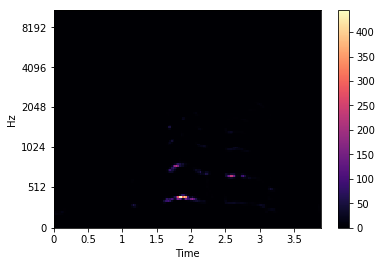

In [20]:
melspectogram = lb.feature.melspectrogram(y=y3, sr=sr3)
lb.display.specshow(melspectogram, y_axis='mel', x_axis='time')
plt.colorbar();